# 1.Introduction

The dataset used in this context is called the "Breast Cancer Wisconsin (Diagnostic) Database.

Key details about the dataset:
- Number of Samples: 569
- Number of Features: 30 numeric, predictive attributes
- Number of Classes: 2

The dataset contains information obtained from digitized images of fine needle aspirates (FNA) of breast masses. These images provide insights into the characteristics of cell nuclei present in the samples. To analyze these characteristics, 30 features were computed for each image, including the mean, standard error, and 'worst' values.

The two target classes in the dataset represent different outcomes:
- Negative outcome (Benign): Indicates a non-cancerous tumor
- Positive outcome (Malignant): Indicates a cancerous tumor

The problem at hand is a binary classification task, where the goal is to develop an algorithm that can accurately determine whether a given tumor is malignant (cancerous) or benign (non-cancerous).


# 2.Importing initial libraries 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Reading

In [39]:
#The dataset can be found in sklearn.datasets
from sklearn import datasets
#The breast cancer dataset is loaded into a variable called data
cancer_data = datasets.load_breast_cancer()

Important insights from the description below:

- It is important to note that there are no missing values in the dataset
- Class Distribution: 212 - Malignant, 357 - Benign

In [40]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [41]:
'''The sklearn datasets come in form of dictionary where the 'keys' are the elementes of the dataset. 
In this case 'data' represents the 'features' and 'target' represents the classes'''
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# 4. Creating DataFrames
Pandas DataFrames are a fast and easy-to-use structures to represent the tabular data above.

In [42]:
# Creating a dataframe for the 'features' (the key = 'data')
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
# Added the target column, and fill it with the target data
df['target'] = cancer_data.target
# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#5.Descriptive Analysis
Descriptive analysis will be performed on the dataset by examining the data types of each attribute and locate any instances of missing values.

In case there were numerical and categorical attributes, they will be analyzed separately. However, in this case all variables are numerical.

# 5.1 Data types and missing values

In [43]:
# Data types
df.dtypes
# The table below contains the Pandas data types. In this case, all variables are numerical

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [44]:
# Data types
df.dtypes
# The table below contains the Pandas data types. In this case, all variables are numerical

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


<Axes: >

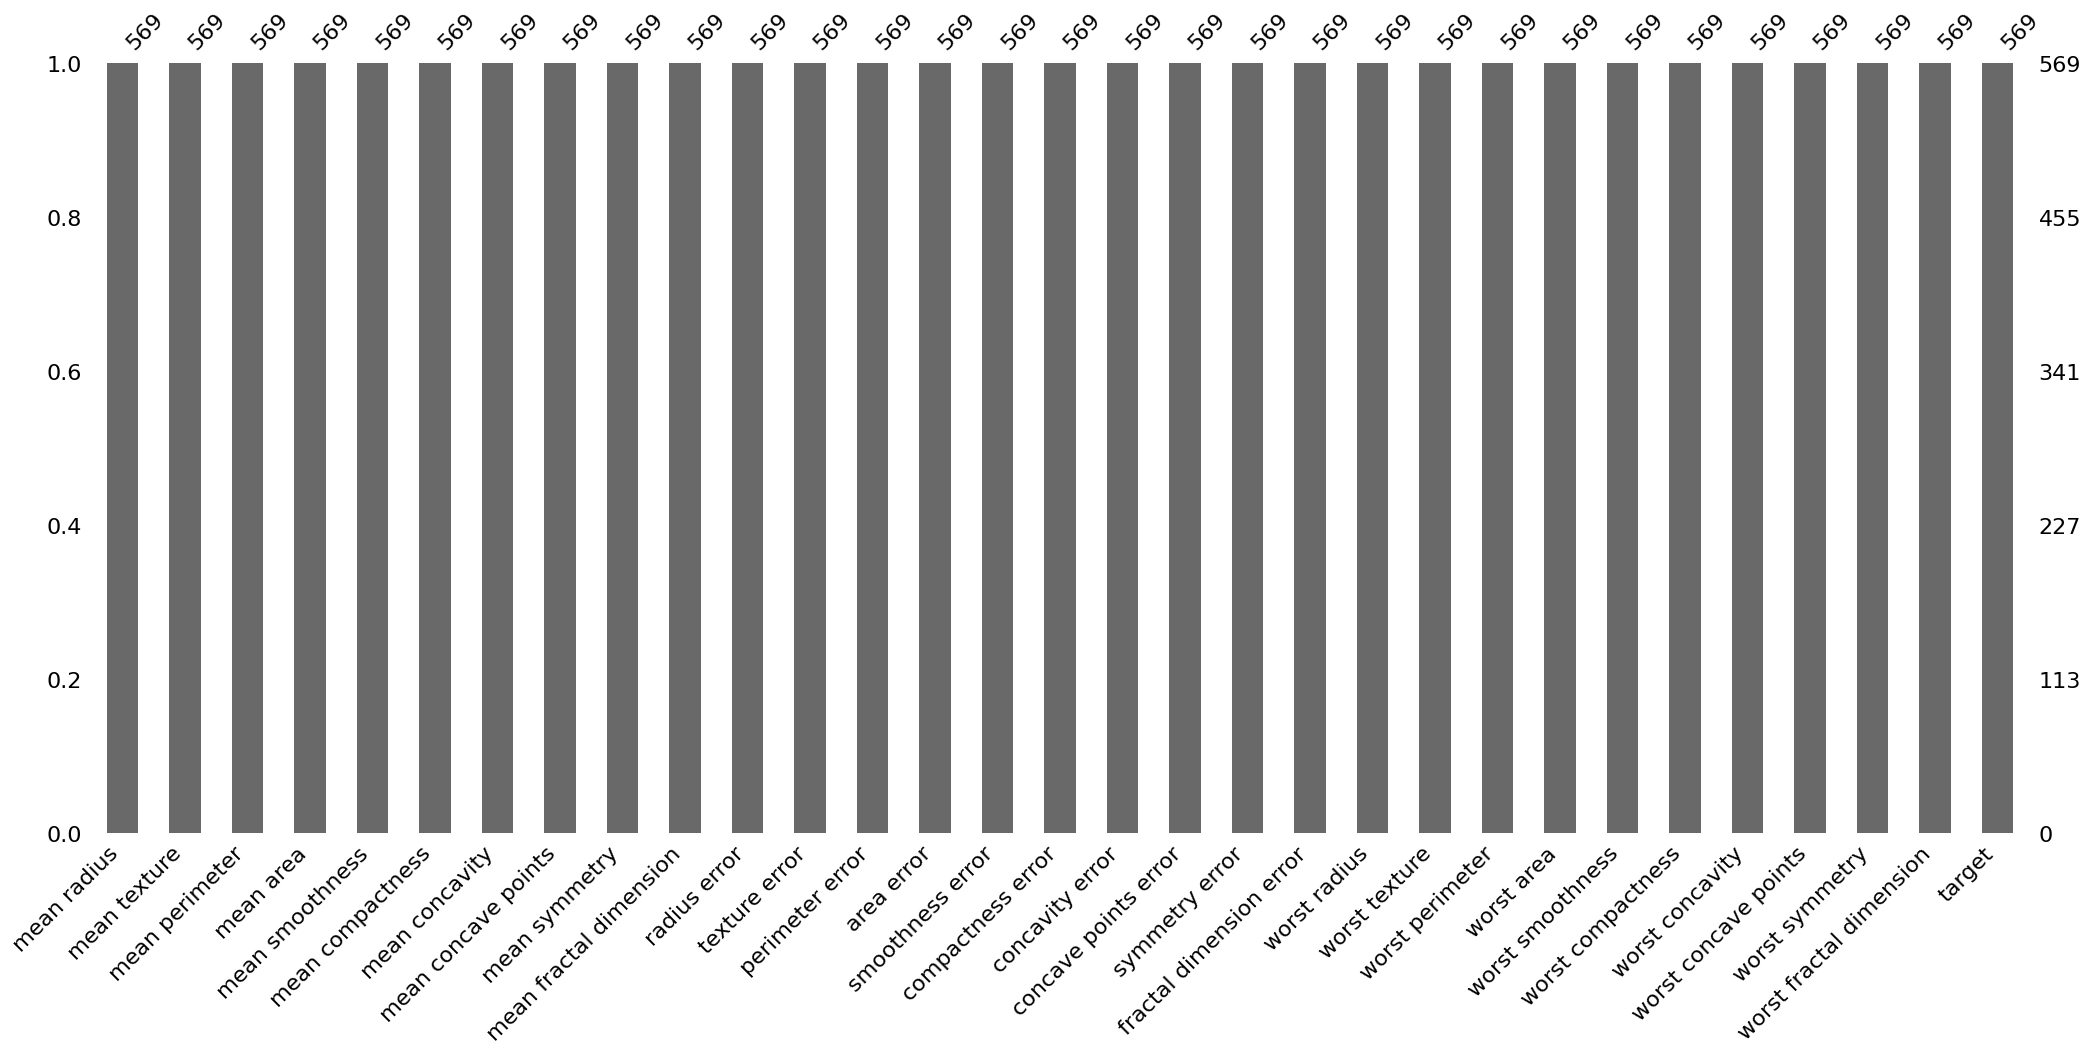

In [45]:
# Missing values
# printing missing values for each feature
print(df.isnull().sum())
# missingno is a library for visualising data completeness
import missingno as msno
msno.bar(df)
# As a conclusion, there are no missing values within the dataset

# 5.2 Numerical Data Types

# 5.2.1 Statistical Data Analysis

In [46]:
# Set the option to display all columns of the dataframe
pd.set_option('display.max_columns', None)

# Display the statistics using df.describe()
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Statistical information Analysis**

This analysis show the total number of rows, mean, standard deviation, min, max in the quantiles of the distribution.
'25%', '50%' and '75%' represent the first, second and third quantiles respectively. The second quantile is the median of the distribution.

The mean is the average value whereas the median refers to the middle value.

Why some features have almost same value for median and mean and for other features, such as 'mean perimeter' or'mean area, the value for their mean its significantly higher than that for their median?

When some features have almost the same value for both the median and mean, it suggests that the data is symmetrically distributed and does not have significant outliers.

On the other hand, when features like 'mean perimeter' or 'mean area' have a mean value that is significantly higher than the median, it might indicate that there are outliers present in the dataset that have larger values. These outliers pull the mean towards higher values, while the median, being less sensitive to extreme values, remains closer to the center of the data.

The presence of outliers on the right side of the data distribution (extreme right) can cause this discrepancy between the mean and median. These outliers can skew the mean towards higher values, resulting in a larger mean compared to the median.

In [47]:
# Average values of different features in the dataset based on the different target categories.
# This grouping operation calculates the mean value for each column in the grouped data, resulting in a new DataFrame that displays the mean values for each column separately for each unique value in the 'target' column
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**Average values based on the different target**

Based on the table above, certain features have similar average values for both 'benign' and 'malignant' cases, such as 'mean smoothness', 'mean symmetry', and 'mean fractal dimension'. This suggests that these features might not be strong differentiating factors between the two cases.

However, other features, such as 'perimeter' and 'compactness', show different average values for 'benign' and 'malignant' cases. The average values for these features are higher in the 'benign' cases compared to the 'malignant' cases. This indicates that 'perimeter' and 'compactness' values tend to be larger for the 'benign' cases, and lower values of these features are considered important risk factors. These features, which exhibit significant differences in mean values between 'benign' and 'malignant' cases, will be given consideration in the project.

Based on this analysis, one possibility is to drop the remaining features that show similar average values between the two cases from further analysis, as they may not provide meaningful differentiation between 'benign' and 'malignant' cases.


# 5.2.2 Visualization for Data Analysis (Histogram)

A histogram is a graphical representation of the distribution of the dataset.  

The following code generates a grid of subplots for the 20  features in the dataFrame 'df', with each histogram grouped by the values of the 'target' column. The resulting plots provide visual insights into the distribution of each feature based on the different target labels.

The x-axis represents the values of the feature being plotted, while the y-axis represents the frequency or count of occurrences of those values.

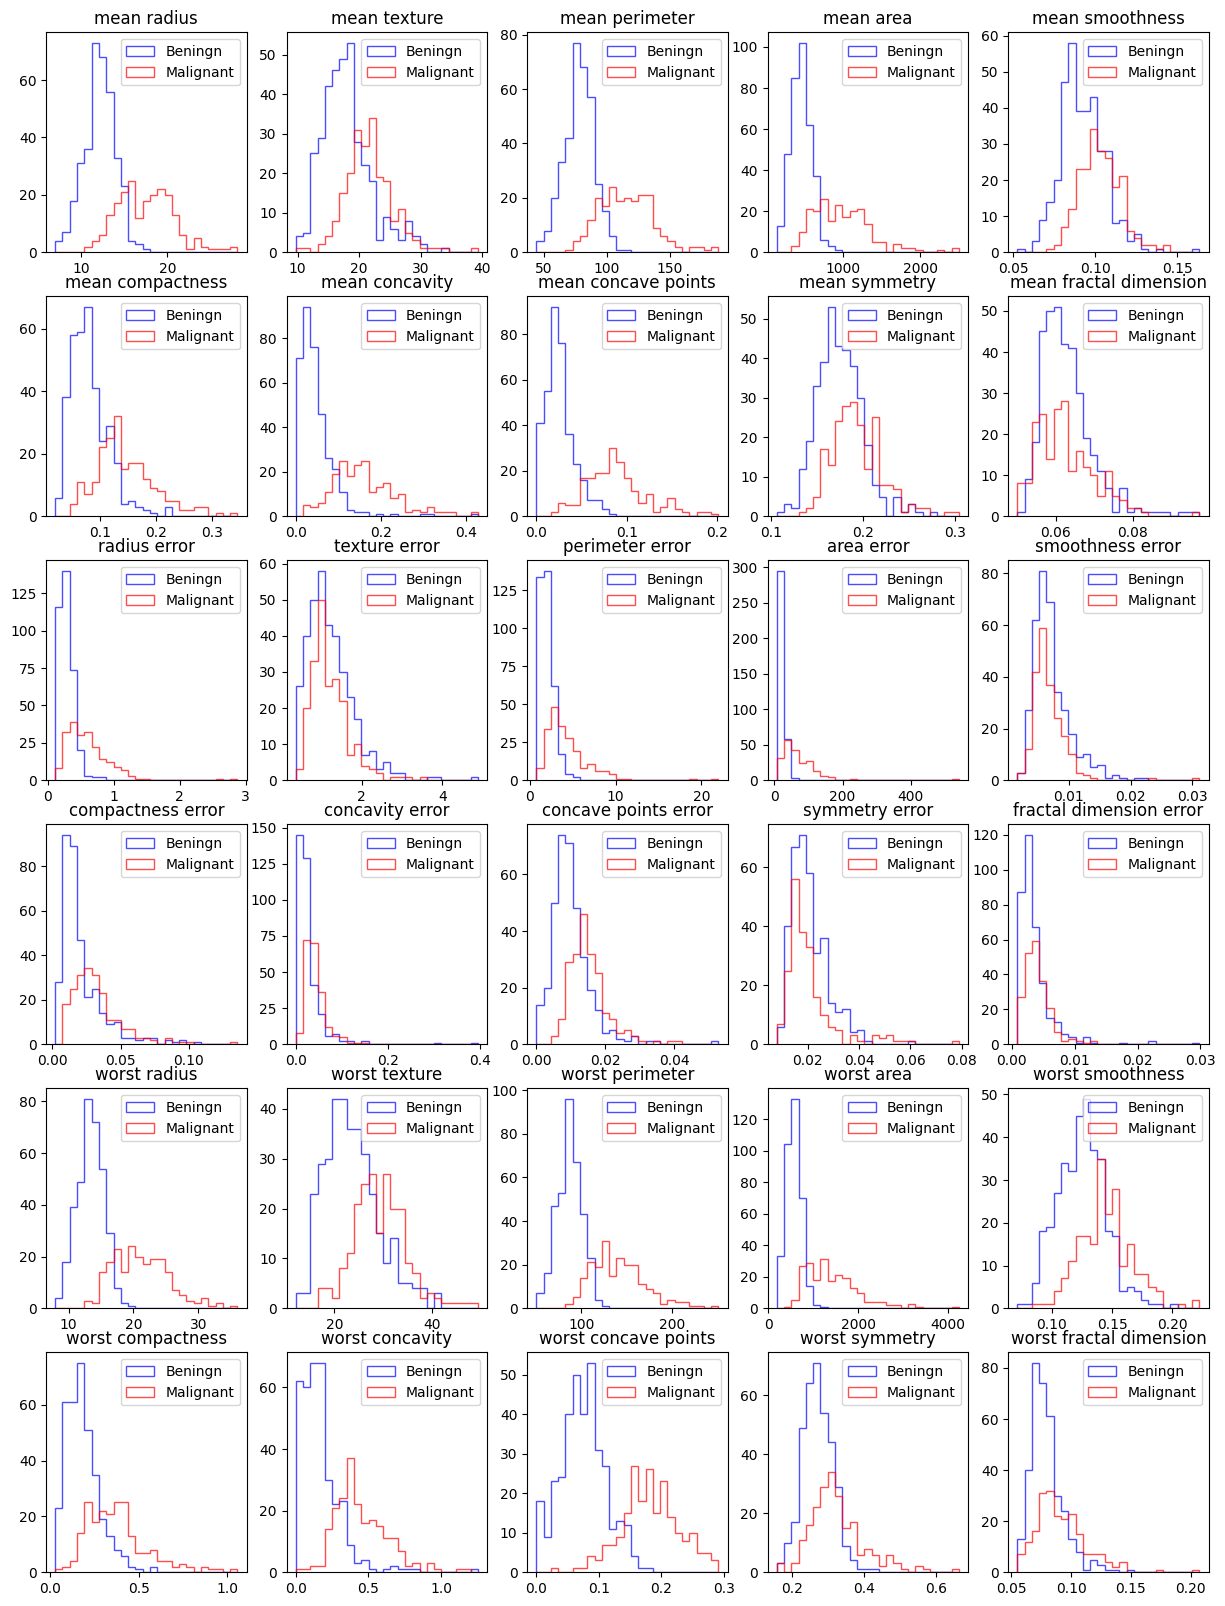

In [48]:
target = df.target.unique() # unique values from diagnosis features : 1 and 0
target_n=['Malignant', 'Beningn'] # labels

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,20)) # axis configuration : 30 features on 6 * 5 charts
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=df.columns[i]
    i=i+1
    ax.hist([df.loc[df.target == x, col] for x in target], label=target_n, bins=25,stacked=False, alpha=0.7,color=['r','b'], histtype='step') # plot the feature histogram 
    ax.legend(loc='upper right') # legend of each chart
    ax.set_title(col) # title

plt.show() # show the 30 charts

**Histogram Analysis**

When the histograms for the 'Benign' and 'Malignant' classes are overlapped, it means that the distribution of the corresponding feature values for both classes is similar. This suggests that the feature might not be a strong differentiating factor between the two classes. 

As an example, this is the case of these features: 'texture error' or 'smoothness error'.

On the other hand, when the histograms for the two classes are separated or distinct over the x-axis, it indicates that the feature values have different distributions for the 'Benign' and 'Malignant' classes. This suggests that the feature can potentially serve as a good differentiator or indicator for distinguishing between the two classes.

Example of features which might be useful for detecting 'bening' vs 'malignant' cases would be: 'mean perimeter',	'mean area', 'mean compactness','mean concavity', 'mean concave points', 'worst radius'.

# 5.2.3 Conclusion from Statistical Analysis and Histograms

**Useful features which distributions and mean values differ from 'malignant' to 'benign' cases (19 features):**

'mean radius, 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points','compactness error', 'concavity error', 'concave points error'.

**Non useful deatures which distributtions and mean values for 'malignant' and 'benign' cases are similar (11 features):**

'mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'smoothness error',  'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst symmetry', 'worst fractal dimension'.

# 6.Bivariate Analysis (Correlation Analysis)

# 6.1 Preparing data for the correlation analysis

To make the correlation analysis easier, three different dataframes have been created, one for each group in which the features can be divided into.
These are the three groups: mean, standard error, and worst.


In [49]:
df_mean= df.filter(regex='mean')# mean group
df_se= df.filter(regex='error') # standard error group
df_worst=df.filter(regex='worst')  # features_worst group

#Showing first 5 rows from one of the dataframes:
df_worst.head()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 6.2 Visualization of the correlation values between features in each group

<Axes: >

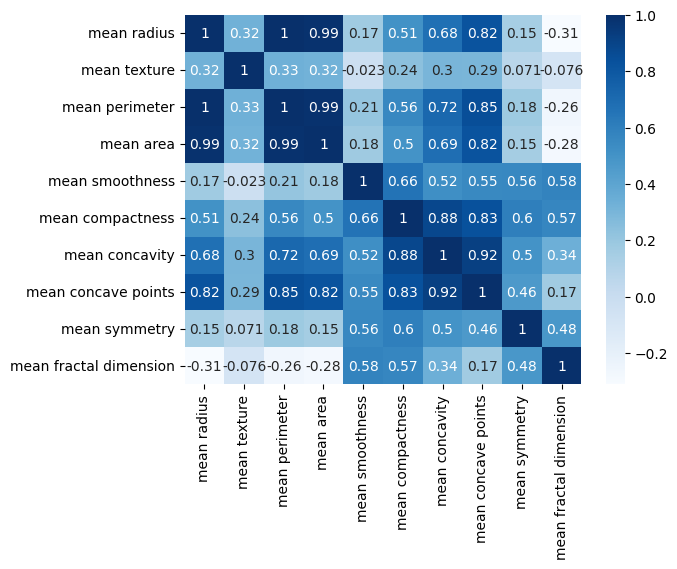

In [50]:
#Study of the correlations between the features in the mean group
sns.heatmap(df_mean.corr(),annot=True,cmap='Blues')

<Axes: >

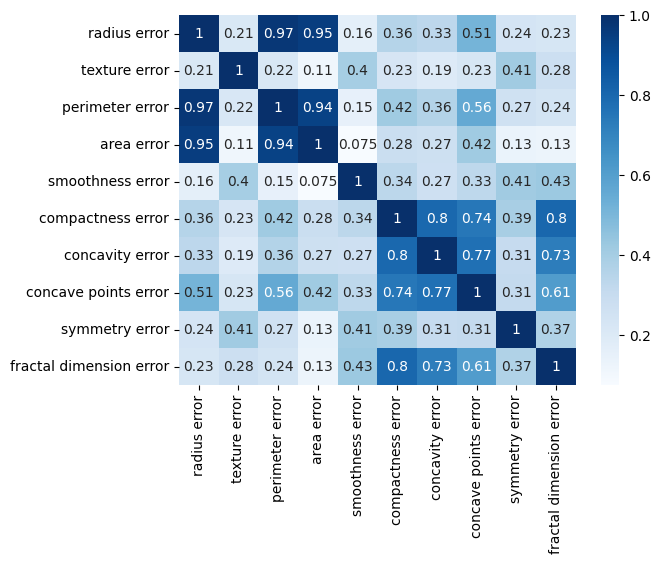

In [51]:
#Study of the correlations between the features in the standard error group
sns.heatmap(df_se.corr(),annot=True,cmap='Blues')


<Axes: >

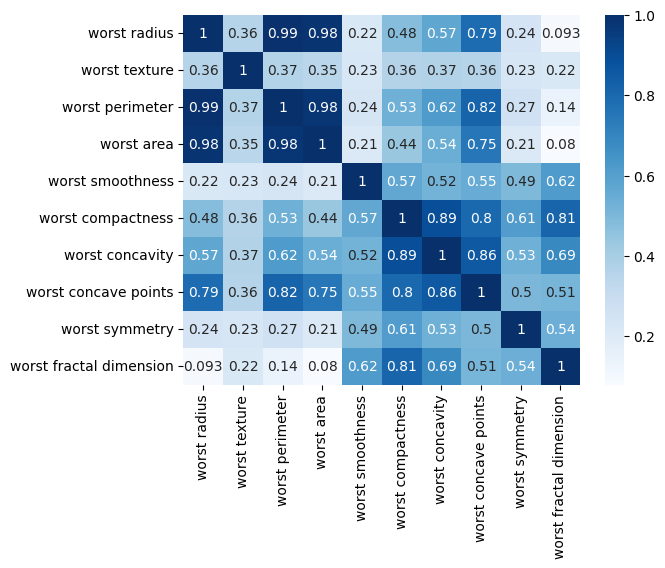

In [52]:
#Study of the correlations between the features in the worst group
sns.heatmap(df_worst.corr(),annot=True,cmap='Blues')

## 6.3 Correlation Analysis Conclusion

From the heatmaps above, it can be concluded the following:

- In this dataset, three features, namely 'radius,' 'perimeter,' and 'area,' are strongly positively correlated with each other (correlation coefficient > 0.9). To avoid redundancy, only one of these features should be kept. 

- Similarly, there are three other features, namely 'concave points,' 'concavity,' and 'compactness,' which exhibit strong positive correlation between them. Therefore only one should be kept.

# 7.Feature Selection


Techniques like univariate feature selection, recursive feature elimination, and L1 regularization (Lasso) can be used to identify and select the most informative features in a dataset.

**Univariate Feature Selection:** This technique evaluates each feature independently by considering its relationship with the target variable. 

**Recursive Feature Elimination (RFE):** RFE is an iterative feature selection method that works by recursively eliminating features and building models based on the remaining features. It starts with all features, ranks them based on a specified metric (e.g., coefficients from a linear model), and eliminates the least important feature in each iteration until a desired number of features is reached.

**L1 Regularization (Lasso):** L1 regularization is a technique that adds a penalty term to the objective function of a model, forcing some of the feature coefficients to become zero. This encourages sparsity in the feature weights and allows for automatic feature selection. The Lasso algorithm is an example of L1 regularization and can be used for feature selection by setting some of the feature coefficients to zero.

In this case, due to both univariate and bivariate analysis provide useful insights, feature selection will based on **combining univariate with bivariate analysis**. 

# 7.1 Feature Selection based on Univariate & Bivariate Analysis

The univariate and bivariate analysis performed above is to provide insights on
the dataset. These insights can inspire the subsequent feature selection. Therefore, the conclusions from both analysis have been put together in order to performe feature selection:

**Conclusion from the Univariate Analysis: Statistical Analysis along with the visualizations from Histograms**

The most useful features, which distributions and mean values differ from 'malignant' to 'benign' cases, are the following (19 features):

'mean radius, 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points','compactness error', 'concavity error', 'concave points error'.

Non useful deatures which distributtions and mean values for 'malignant' and 'benign' cases are similar (11 features):

'mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'smoothness error',  'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst symmetry', 'worst fractal dimension'.

**Conclusion from the Bivariate Analysis (correlation)**

In this dataset, three features, namely 'radius,' 'perimeter,' and 'area,' are strongly positively correlated with each other (correlation coefficient > 0.9). To avoid redundancy, only one of these features seems necessary. 

Similarly, there are three other features, namely 'concave points,' 'concavity,' and 'compactness,' which exhibit strong positive correlation. 



# 7.2 Deciding which highly correlated features to keep

This is extract from the Summary Statistics (see 3.Data Reading) will be used to orientate the feature selection:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0

    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
   
    radius (standard error):              0.112  2.873
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2

    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
 
    radius (worst):                       7.93   36.04
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0

    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291

As the 'radius' exhibits more homogeneous values without outliers compared to 'perimeter' and 'area', and the minimum and maximum values for 'perimeter' and 'area' differ significantly, then choosing to **keep the 'radius'** feature seems reasonable.

The same occurs with 'concave points', which presents more homogeneus values than 'compactness' and 'concavity'. Therefore, **'concave points' will be the feature to keep.**

The homogenity of the data can also be seen through the **violion plots**. 

Violin plots represent the distribution of data as a symmetrical or mirrored violin-shaped curve. The width of the violin at a particular point represents the density or frequency of data points at that value.

Violin plots are particularly useful for comparing the distributions of multiple features, as the violin shapes can be easily compared to identify differences in the distributions.

Violin plots for 'radius (mean)', 'perimeter (mean)' and 'area (mean)' are displayed below.

As can be seen below, the violin plots for the **'radius' feature exhibit a more compact and less variable distribution compared to the 'perimeter' and 'area'** features, it further supports the decision to choose 'radius' as the feature to keep. A narrower and less spread-out violin plot typically indicates a more homogeneous distribution of values, which can be advantageous for modeling and analysis.

In [53]:
# Violin plots to visualize the numerical features
#Violin plots show the same information than the histograms but in a different format
## VIOLIN PLOTS####
#Visualization of some of the risk features detected above using violin plots (for the mean group)
import plotly.express as px
fig = px.violin(df,
                y='mean perimeter',
                x='target',
               color='target',
               points='all',
              box=True)
fig.show()
fig = px.violin(df,
                y='mean area',
                x='target',
                color='target',
                points='all',
                box=True)
fig.show()
fig = px.violin(df,
                y='mean radius',
                x='target',
                color='target',
                points='all',
                box=True)
fig.show()


# 7.3 Dropping the non-useful features

Non-useful features from the univariate analysis (11): 

'mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst symmetry', 'worst fractal dimension'.

Highly correlated features with extreme values (12): 

'mean perimeter', 'mean area', 'perimeter error','area error', 'worst perimeter', 'worst area', 'mean compactness','mean concavity','compactness error', 'concavity error','worst compactness', 'worst concavity'

**Total features to drop: 23**

In [54]:
df.drop(['mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst symmetry', 'worst fractal dimension', 'mean perimeter', 'mean area', 'perimeter error','area error', 'worst perimeter', 'worst area','mean compactness','mean concavity','compactness error', 'concavity error','worst compactness', 'worst concavity'], axis=1,inplace=True)

print(f"Number of features after dropping the highly correlated ones is: {len(df.columns)}")

Number of features after dropping the highly correlated ones is: 8


In [55]:
df.tail()

,mean radius,mean concave points,radius error,concave points error,worst radius,worst texture,worst concave points,target
564,21.56,0.13890,1.1760,0.02454,25.450,26.40,0.2216,0
565,20.13,0.09791,0.7655,0.01678,23.690,38.25,0.1628,0
566,16.60,0.05302,0.4564,0.01557,18.980,34.12,0.1418,0
567,20.60,0.15200,0.7260,0.01664,25.740,39.42,0.2650,0
568,7.76,0.00000,0.3857,0.00000,9.456,30.37,0.0000,1


# 8. Feature Engineering

Engineer new features that might provide additional information for the classification task. This can involve creating interaction terms, polynomial features, or transforming existing features.

For example, you could calculate ratios, logarithms, or other mathematical transformations of the original features that could capture nonlinear relationships. In this case this section will not be applied.

# 9. Data Processing

Data preprocessing is a crucial step before training the logistic regression model.

# 9.1. Handling Missing Values

Depending on the amount and nature of missing data, you can choose to drop rows or columns with missing values, perform mean or median imputation, or use more advanced techniques like regression imputation or multiple imputation.

In this case, as seen above, there are no missing values within the dataset (see 5.1)

# 9.2 Separating features from target

Separating the features from the target variable is typically done before applying any preprocessing techniques, including standardization. The reason for this is that the target variable is not subject to the same transformations as the input features, as it represents the variable you are trying to predict.

In [56]:
#Splitting the dataset into features and target
y = df['target'] #output
X = df.drop('target', axis=1) #features
print("X: ", X.shape)
print("y: ", y.shape)

X:  (569, 7)
y:  (569,)


# 9.3.Normalizing or Standardizing Numerical Features

**Normalization**: Scale numerical features to a specific range, such as [0, 1] or [-1, 1], to ensure they have a similar scale. Common normalization techniques include min-max scaling or decimal scaling.

It is particularly useful when you want to preserve the original distribution shape of the feature but ensure that all values fall within a specific range.

Normalize when the absolute values or the scale of the feature are not as important as the relative relationships between the values.

It can be helpful in algorithms that rely on distance calculations, such as k-nearest neighbors (KNN) or support vector machines (SVM).

**Standardization**: Transform numerical features to have zero mean and unit variance, making them comparable and suitable for models that assume a normal distribution. This can be achieved using techniques like Z-score normalization

Standardization helps to center the data around zero and make it suitable for models that assume a normal distribution or when features have different units or scales.

It is commonly used in algorithms such as linear regression, logistic regression, or neural networks.

In this case, Standardization will be used.

In [57]:
#The Standard scaler has been used scaled all the values in such a way that they all have a mean equal to 0 and standard deviation equal to 1. 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_scaled.head()


,mean radius,mean concave points,radius error,concave points error,worst radius,worst texture,worst concave points
0,1.097064,2.532475,2.489734,0.660820,1.886690,-1.359293,2.296076
1,1.829821,0.548144,0.499255,0.260162,1.805927,-0.369203,1.087084
2,1.579888,2.037231,1.228676,1.424827,1.511870,-0.023974,1.955000
3,-0.768909,1.451707,0.326373,1.115007,-0.281464,0.133984,2.175786
4,1.750297,1.428493,1.270543,1.144205,1.298575,-1.466770,0.729259


# 9.4 Dealing with Imbalanced Classes

1    357
0    212
Name: target, dtype: int64


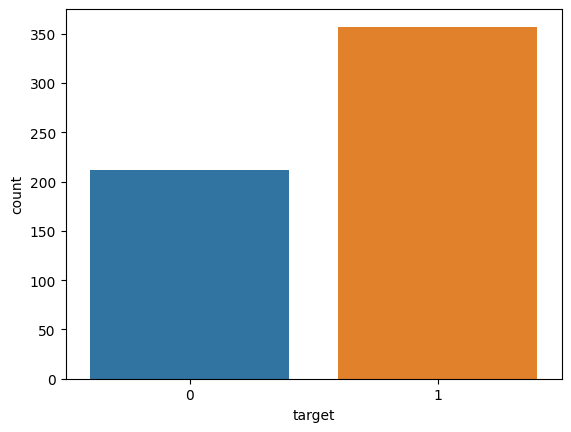

In [58]:
# Counting benign vs malignant cases within the dataset
target = df['target'].value_counts()
print(target)
sns.countplot(x='target', data=df)
plt.show()

In [59]:
# The dataset is imbalanced (63% of the data represents benign cases)
neg, pos = np.bincount(df['target'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 569
    Positive: 357 (62.74% of total)



In this case the class distribution is not heavily skewed. 63% of the data represents benign cases, the class imbalance is not extreme. 

Different factors should be considered to decide wether to deal with the class imbalance:

**Evaluation Metrics**: If the selected evaluation metric is sensitive to imbalanced data, such as accuracy, it may be worth addressing the class imbalance. Accuracy can be misleading when the classes are imbalanced, as a model that always predicts the majority class can achieve high accuracy while performing poorly on the minority class.

**Data Sampling Techniques:** There are various techniques available to address class imbalance, such as oversampling the minority class (e.g., with techniques like SMOTE) or undersampling the majority class. These techniques can help balance the class distribution and potentially improve the model's performance on the minority class.

**Model Sensitivity:** Some machine learning algorithms, such as decision trees or random forests, are inherently robust to class imbalance and can handle imbalanced data effectively without additional modifications.

**In this case, the class distribution is not heavily skewed, with 63% of the data representing benign cases, indicating a moderate class imbalance. 
In addition to that, the chosen evaluation metric is 'recall,' which is not as sensitive to class imbalance as accuracy. Therefore, it is determined that the class distribution will not be modified.**

# 9.5 Handling Outliers

When dealing with outliers, the first step is to identify and analyze outliers in numerical features. Once identified, the next step is to decide how to handle them. Options include removing outliers, transforming them, or using robust statistical methods that are less sensitive to outliers.

In this case, the 'perimeter' and 'area' features, which exhibited the largest differences between minimum and maximum values, were found to potentially contain outliers. However, it was decided to drop these features from further analysis. By doing so, the focus will be placed on the remaining features without the need for additional outlier analysis.

# 9.6 Creating training and testing subsets

In [60]:
#Creating training and testing datasets 
# I will consider 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 0)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (455, 7)
y_train:  (455,)
X_test:  (114, 7)
y_test:  (114,)


# 10. Model Training
Logistic regression will be employed for this analysis. Logistic regression is a statistical model that estimates the probability of an event occurring, in this case, whether the cells are benign or malignant. The goal is to predict the likelihood of each outcome based on the input features and determine the probability of a cell being classified as either benign or malignant.

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
log


LogisticRegression(random_state=0)

In [63]:
#Model accuracy on test data
print("Model Accuracy on Testing Data: ", log.score(X_test,y_test))

Model Accuracy on Testing Data:  0.956140350877193


In [64]:
#Predictions on test data
y_pred_log =log.predict(X_test)
y_pred_log

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1])

In [65]:
#Probabilities 
log.predict_proba(X_test)

array([[9.88310052e-01, 1.16899481e-02],
       [4.10395711e-02, 9.58960429e-01],
       [3.96654051e-03, 9.96033459e-01],
       [2.79479772e-02, 9.72052023e-01],
       [9.19881453e-04, 9.99080119e-01],
       [2.76200642e-03, 9.97237994e-01],
       [6.36598276e-03, 9.93634017e-01],
       [1.28506251e-03, 9.98714937e-01],
       [4.05978447e-04, 9.99594022e-01],
       [1.38560381e-04, 9.99861440e-01],
       [2.51805105e-01, 7.48194895e-01],
       [1.39808215e-01, 8.60191785e-01],
       [1.07005545e-04, 9.99892994e-01],
       [5.27144546e-01, 4.72855454e-01],
       [4.64780830e-01, 5.35219170e-01],
       [9.63977324e-01, 3.60226755e-02],
       [3.76622378e-03, 9.96233776e-01],
       [9.99955025e-01, 4.49752169e-05],
       [9.97849588e-01, 2.15041160e-03],
       [9.99999317e-01, 6.83188871e-07],
       [8.92523360e-01, 1.07476640e-01],
       [9.65462836e-01, 3.45371636e-02],
       [3.69409489e-02, 9.63059051e-01],
       [3.52598428e-03, 9.96474016e-01],
       [9.993832

# 11. Model Evaluation

When evaluating models for binary classification tasks, it is crucial to utilize appropriate evaluation metrics that align with the problem's specific requirements. Commonly used evaluation metrics include:

**Accuracy**: Measures the overall correctness of the model's predictions by calculating the proportion of correctly classified instances.

**Precision**: Determines the proportion of true positive predictions out of the total predicted positives, providing insights into the model's ability to avoid false positives.

**Recall**: Measures the proportion of true positive predictions out of the total actual positives, indicating the model's ability to identify all positive instances.

**F1-score**: Combines precision and recall into a single metric, providing a balanced measure of the model's performance.

**Area Under the Receiver Operating Characteristic Curve (AUC-ROC)**: Illustrates the trade-off between true positive rate and false positive rate across various classification thresholds, giving a comprehensive evaluation of the model's performance.

**In addition to choosing suitable evaluation metrics, it is important to employ techniques like cross-validation to ensure robust evaluation and mitigate the risk of overfitting. Cross-validation helps assess the model's generalization ability by training and evaluating the model on different subsets of the data.**

**Confusion matrix** is not a metric itself but rather a tabular representation of the performance of a classification model. It provides a detailed breakdown of the predicted and actual class labels, allowing for the calculation of various evaluation metrics.

The confusion matrix is not a metric itself but rather a tabular representation of the performance of a classification model. It provides a detailed breakdown of the predicted and actual class labels, allowing for the calculation of various evaluation metrics.

A confusion matrix organizes the model's predictions into four categories:

- True Positive (TP): cases correctly predicted as positive (predicted positive and actually positive).
- True Negative (TN): cases correctly predicted as negative (predicted negative and actually negative).
- False Positive (FP): cases incorrectly predicted as positive (predicted positive but actually negative).
- False Negative (FN): cases incorrectly predicted as negative (predicted negative but actually positive).

From the values in the confusion matrix, several evaluation metrics can be calculated, including:

- Accuracy: The proportion of correctly classified cases (TP + TN) divided by the total number of cases.
- Precision: The proportion of true positive predictions (TP) divided by the total predicted positive cases (TP + FP).
- Recall: The proportion of true positive predictions (TP) divided by the total actual positive cases (TP + FN).
- Precision: The proportion of true negative predictions (TN) divided by the total actual negative cases (TN + FP).

Text(0.5, 23.52222222222222, 'Predicted label')

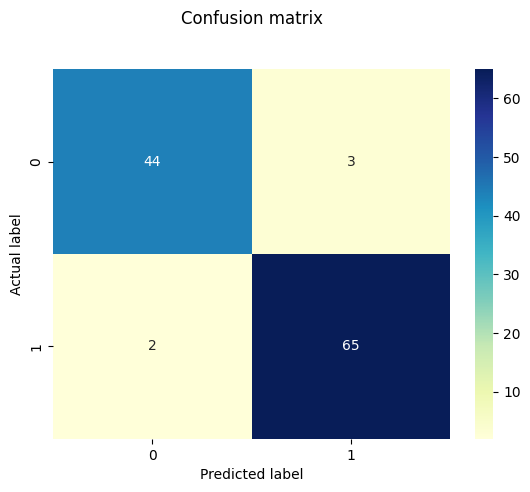

In [66]:
#confusion matrix
from sklearn.metrics import f1_score, make_scorer, recall_score, precision_recall_curve, average_precision_score, confusion_matrix, precision_score, classification_report, accuracy_score, precision_recall_fscore_support, roc_curve

confusion_matrix_lr = confusion_matrix(y_test,y_pred_log)
sns.heatmap(pd.DataFrame(confusion_matrix_lr), cmap = 'YlGnBu', annot = True, fmt = 'g'),
plt.title('Confusion matrix', y=1.1),
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.show()

In [67]:
precision = precision_score(y_test, y_pred_log)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred_log)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred_log)
print('F1 score: %f' % f1)
acc = accuracy_score(y_test, y_pred_log)
print("Accuracy: {}".format(acc))

Precision: 0.955882
Recall: 0.970149
F1 score: 0.962963
Accuracy: 0.956140350877193


# Insights from the Model Evaluation
When detecting tumors, inaccurate predictions could have drastic consequences. Hence, an actual 'malignant' tumor should not be labelled as a 'benign' because that patient could die if they do not receive treatment (False negative predictions).

However, if a 'benign' tumor is labelled as 'malignant', the consequences are not so serious (False positive predictions). 

Thus, this problem requires the least possible number of false negative cases. The confusion matrix shows 2 false negative cases and 3 false positives.

Altough the 'recall' value is quite high 97% we should try improving the model to reduce the false negative cases and therefore, increase the recall. Recall seems to be the proper metric for this problem.

# 12. Hyperparameter Optimization


In order to fine-tune the logistic regression model, it is important to perform hyperparameter optimization. Hyperparameters are settings or configurations of the model that are not learned from the data but need to be specified by the user. By tuning these hyperparameters, we can improve the model's performance.

Some of the hyperparameters that can be optimized for a logistic regression model include:

**Regularization Strength** (C or alpha): Controls the extent of regularization applied to the model. A higher value reduces the impact of regularization, while a lower value increases it.

**Penalty Type** (L1 or L2): Determines the type of regularization used. L1 regularization (Lasso) encourages sparse solutions by shrinking some coefficients to zero, while L2 regularization (Ridge) applies a smoother shrinkage to all coefficients.

**Solver Algorithm:** Determines the algorithm used for optimization. Popular solver options include 'lbfgs', 'liblinear', and 'saga', each with its own advantages and considerations.

**Convergence Criteria:** Defines the criteria used to determine when the optimization process has converged, indicating that the model has reached an optimal solution. It may include parameters like maximum iterations or convergence tolerance.

To find the best combination of hyperparameters, various hyperparameter optimization strategies can be employed, such as grid search, random search, or Bayesian optimization. These techniques systematically explore different hyperparameter configurations and evaluate their impact on model performance using appropriate evaluation metrics.

By performing hyperparameter optimization, we can fine-tune the logistic regression model and identify the optimal hyperparameter values that maximize its predictive performance.

In this project, Hyperparameter optimization was carried using GridSearchCV, which is a technique that provides the best combination of the tested hyperparameters.

These were the parameters tested in order to obtain the highest possible recall value:

- solvers = ['newton-cg', 'lbfgs', 'liblinear']
- penalty = ['l2']
- c_values = [100, 10, 1.0, 0.1, 0.01]

In [68]:
# defined the model and its parameters
model = LogisticRegression(random_state=1)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# defined grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='recall')
grid_result = grid_search.fit(X_train, y_train)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [69]:
# The algorithm was trained using the best hyperparameters obtained above
log2=LogisticRegression(C=0.01,penalty="l2",solver='newton-cg')
log2.fit(X_train, y_train)
print("score",log2.score(X_test,y_test))

score 0.9473684210526315


In [70]:
y_pred_log2 =log2.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted label')

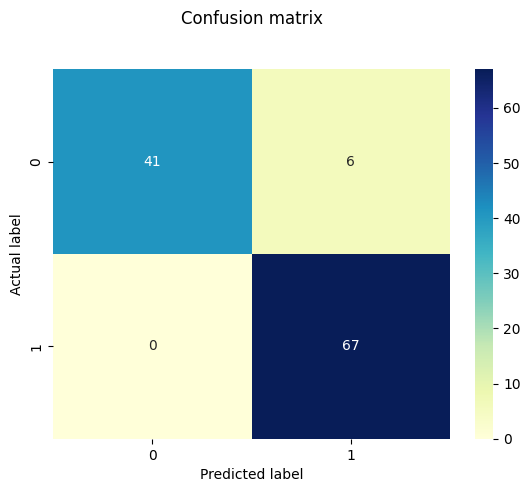

In [71]:
#confusion matrix
confusion_matrix_lr2 = confusion_matrix(y_test,y_pred_log2)
sns.heatmap(pd.DataFrame(confusion_matrix_lr2), cmap = 'YlGnBu', annot = True, fmt = 'g'),
plt.title('Confusion matrix', y=1.1),
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.show()

In [72]:
precision = precision_score(y_test, y_pred_log2)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred_log2)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred_log2)
print('F1 score: %f' % f1)
acc = accuracy_score(y_test, y_pred_log2)
print("Accuracy: {}".format(acc))

Precision: 0.917808
Recall: 1.000000
F1 score: 0.957143
Accuracy: 0.9473684210526315


# 13. Conclusion 

The optimized model achieved an impressive correct prediction rate of 94.73%, accurately classifying 108 cases out of the total dataset. Notably, the model demonstrated zero false negative cases, ensuring that no potentially 'malignant' cases were mislabeled as 'benign.'

As anticipated, the initial model underwent significant improvement, resulting in the elimination of false negative instances, which decreased from 2 to 0. This improvement is reflected in the model's recall score, which increased from 97% to a perfect 100%.

These promising results affirm the reliability of the optimized model in accurately detecting whether a tumor is benign or malignant, exhibiting high accuracy, a flawless false negative rate, and an improved recall score.

Furthermore, if the results did not meet the desired expectations, **Ensemble Methods** could be considered as a potential solution. Techniques such as bagging (e.g., Random Forests) or boosting (e.g., AdaBoost) leverage multiple logistic regression models to capture complex relationships in the data and further enhance predictive accuracy.